In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
from ipywidgets import interact, widgets
import re
import mailbox
import csv

In [3]:
df = pd.read_csv('../other_formats/gapminder.csv')

In [4]:
df.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,1.711157
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,1.771389


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
df.describe()

,year,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
count,14740.000000,1.474000e+04,14740.000000,14740.000000,14740.000000,14740.000000,14740.000000
mean,1961.687924,2.252933e+07,56.834526,84.452665,4.643472,9000.506513,24.642044
std,50.480650,9.307143e+07,15.868464,14.472179,1.994833,14912.146692,40.827233
min,1800.000000,2.128000e+03,4.000000,33.217000,1.130000,142.000000,0.388775
25%,1955.000000,8.990308e+05,44.230000,75.182250,2.630000,1391.000000,3.808350
50%,1975.000000,4.063978e+06,60.080000,89.693000,5.060000,3509.000000,9.607118
75%,1995.000000,1.218722e+07,70.380000,96.870000,6.440000,10244.000000,28.046543
max,2015.000000,1.376049e+09,83.300000,99.810000,9.220000,182668.000000,500.117728


In [8]:
df.loc[df['country'] == 'Brazil']

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
1782,Brazil,1800,America,3639636.0,32.00,58.256,6.26,1109.0,3.036277
1783,Brazil,1810,America,4058652.0,32.00,58.256,6.26,1110.0,3.039014
1784,Brazil,1820,America,4582325.0,32.00,58.256,6.26,1112.0,3.044490
1785,Brazil,1830,America,5301068.0,31.99,58.256,6.26,1136.0,3.110198
1786,Brazil,1840,America,6206694.0,31.99,58.256,6.26,1160.0,3.175907
...,...,...,...,...,...,...,...,...,...
1858,Brazil,2011,America,200517584.0,73.80,98.410,1.82,15101.0,41.344285
1859,Brazil,2012,America,202401584.0,74.00,98.490,1.81,15234.0,41.708419
1860,Brazil,2013,America,204259377.0,74.10,98.560,1.80,15518.0,42.485969
1861,Brazil,2014,America,206077898.0,74.30,98.620,1.79,15412.0,42.195756


In [9]:
df.loc[df['country'] == 'Canada']

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
2349,Canada,1800,America,645526.0,39.00,66.653,5.72,1314.0,3.597536
2350,Canada,1810,America,727603.0,39.01,66.653,5.72,1400.0,3.832991
2351,Canada,1820,America,879432.0,39.03,66.653,5.72,1491.0,4.082136
2352,Canada,1830,America,1202146.0,39.04,66.653,5.72,1651.0,4.520192
2353,Canada,1840,America,1745604.0,40.19,67.978,5.72,1922.0,5.262149
...,...,...,...,...,...,...,...,...,...
2425,Canada,2011,America,34499905.0,81.60,99.460,1.61,41567.0,113.804244
2426,Canada,2012,America,34868151.0,81.60,99.470,1.66,41865.0,114.620123
2427,Canada,2013,America,35230612.0,81.60,99.480,1.67,42213.0,115.572895
2428,Canada,2014,America,35587793.0,81.70,99.500,1.68,42817.0,117.226557


In [10]:
len(df)

14740

In [11]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hung

In [15]:
len(df.country.unique())

182

In [16]:
df.loc[0:200:10]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.00,603.0,1.650924
10,Afghanistan,1900,Asia,5021241.0,27.19,51.823,7.00,793.0,2.171116
20,Afghanistan,1955,Asia,8270024.0,29.27,60.193,7.67,1125.0,3.080082
30,Afghanistan,1965,Asia,9935358.0,34.60,66.590,7.67,1182.0,3.236140
40,Afghanistan,1975,Asia,12582954.0,39.61,72.060,7.67,1201.0,3.288159
50,Afghanistan,1985,Asia,11630498.0,45.21,78.400,7.68,1384.0,3.789185
60,Afghanistan,1995,Asia,16772522.0,49.40,84.770,7.83,872.0,2.387406
70,Afghanistan,2005,Asia,24399948.0,52.00,88.040,6.93,1146.0,3.137577
80,Afghanistan,2015,Asia,32526562.0,53.80,90.890,4.47,1925.0,5.270363
90,Albania,1890,Europe,741688.0,35.40,62.480,4.60,1008.0,2.759754


In [17]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

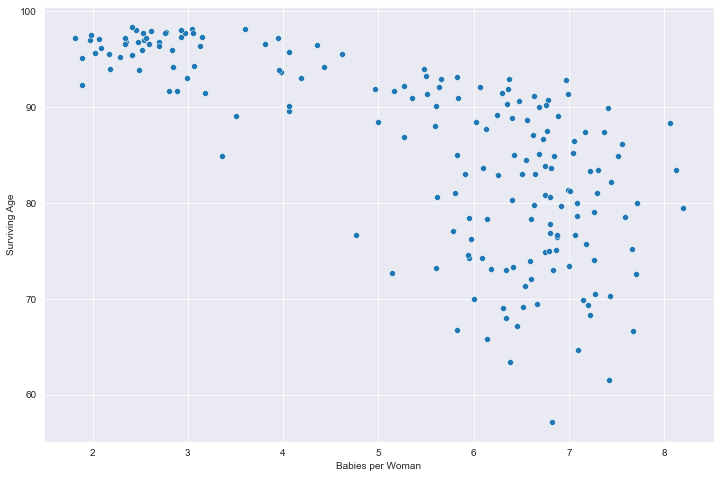

In [20]:
sns.scatterplot(x='babies_per_woman', y='age5_surviving', data=df[df.year == 1965])
plt.xlabel('Babies per Woman')
plt.ylabel('Surviving Age')
plt.show()

In [69]:
def plotyear(year):
    data = df[df.year == year]
    area = 5e-6 * data.population
    colors = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

    sns.scatterplot(x='babies_per_woman', y='age5_surviving', hue=colors, data=data, s=area)
    plt.axis(ymin=50, ymax=105, xmin=0, xmax=8)
    plt.xlabel('Babies Per Woman')
    plt.ylabel('% of Children Alive at age 5')

In [70]:
interact(plotyear, year=widgets.IntSlider(min=1950,max=2015,step=1,value=1965))

interactive(children=(IntSlider(value=1965, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<function __main__.plotyear(year)>